## Loading the 311 Data

The 311 data set is available here: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from seaborn import set_style #this is only for aesthetic purposes
set_style("whitegrid")

In [3]:
df = pd.read_csv("311_2023.csv",low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507776 entries, 0 to 1507775
Data columns (total 41 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unique Key                      1507776 non-null  int64  
 1   Created Date                    1507776 non-null  object 
 2   Closed Date                     1400119 non-null  object 
 3   Agency                          1507776 non-null  object 
 4   Agency Name                     1507776 non-null  object 
 5   Complaint Type                  1507776 non-null  object 
 6   Descriptor                      1477804 non-null  object 
 7   Location Type                   1315859 non-null  object 
 8   Incident Zip                    1491002 non-null  object 
 9   Incident Address                1442077 non-null  object 
 10  Street Name                     1442041 non-null  object 
 11  Cross Street 1                  1021406 non-null  object 
 12  

In [4]:
df.describe()

,Unique Key,BBL,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,1.507776e+06,1.335945e+06,1.482947e+06,1.483187e+06,1.482919e+06,1.482919e+06
mean,5.695249e+07,2.714531e+09,1.005201e+06,2.072241e+05,4.073541e+01,-7.392437e+01
std,4.740000e+05,1.166625e+09,2.124145e+04,3.142884e+04,8.626648e-02,7.660823e-02
min,5.612250e+07,0.000000e+00,9.133530e+05,1.211520e+05,4.049895e+01,-7.425495e+01
25%,5.653984e+07,2.027220e+09,9.930060e+05,1.839210e+05,4.067141e+01,-7.396842e+01
50%,5.695417e+07,3.016810e+09,1.004201e+06,2.051580e+05,4.072973e+01,-7.392798e+01
75%,5.736477e+07,4.006060e+09,1.017619e+06,2.361040e+05,4.081468e+01,-7.387947e+01
max,5.777090e+07,5.270001e+09,1.067279e+06,2.718760e+05,4.091287e+01,-7.370038e+01


In [5]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,56134647,12/01/2022 12:00:11 AM,12/09/2022 04:38:58 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10301,200 VICTORY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636293,-74.082440,"(40.636293474974806, -74.08244046227374)"
1,56131589,12/01/2022 12:00:17 AM,12/01/2022 01:52:43 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10030,2427 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.819537,-73.940600,"(40.819536592759505, -73.94059981128)"
2,56126881,12/01/2022 12:00:46 AM,12/01/2022 12:45:26 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11691,20-21 SEAGIRT BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.595156,-73.754689,"(40.595155544134954, -73.75468870713773)"
3,56129263,12/01/2022 12:00:54 AM,12/01/2022 02:16:33 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233,1647 STERLING PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671113,-73.924160,"(40.67111284206312, -73.92416031442114)"
4,56125629,12/01/2022 12:01:00 AM,12/01/2022 01:17:24 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11221,150 MALCOLM X BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688335,-73.930144,"(40.688334599490894, -73.93014442097454)"


In [12]:
df.describe(include=object)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Location
count,1507776,1400119,1507776,1507776,1507776,1477804,1315859,1491002,1442077,1442041,...,1507087,1507776,344,896,16765,9350,4925,3474,9337,1482919
unique,1229131,982674,17,16,193,923,142,328,341357,10168,...,867,6,4,5,9514,75,220,295,801,354959
top,03/28/2023 12:00:00 PM,05/10/2023 12:00:00 AM,NYPD,New York City Police Department,Illegal Parking,Loud Music/Party,Street/Sidewalk,11226,78-15 PARSONS BOULEVARD,BROADWAY,...,Unspecified,BROOKLYN,Car Service,MANHATTAN,"JOHN F KENNEDY AIRPORT, QUEENS (JAMAICA) ,NY, ...",1,North/Bronx Bound,Roadway,Platform,"(40.72195913199264, -73.80969682426189)"
freq,216,531,621039,621039,224726,142063,434188,24797,6615,18065,...,1502893,463456,322,270,1259,837,309,1710,2459,6615


In [8]:
df['Agency'].value_counts()

Agency
NYPD                                            621039
HPD                                             366635
DSNY                                            128277
DOT                                             107396
DEP                                              75882
DPR                                              46953
DOB                                              45442
DOHMH                                            38465
EDC                                              32427
TLC                                              17005
DHS                                              15783
DCA                                               9392
NYC311-PRD                                        1034
DCWP                                               982
DOE                                                615
DEPARTMENT OF CONSUMER AND WORKER PROTECTION       361
OTI                                                 88
Name: count, dtype: int64

In [9]:
df['Complaint Type'].value_counts()

Complaint Type
Illegal Parking               224726
HEAT/HOT WATER                165077
Noise - Residential           141438
Blocked Driveway               79762
UNSANITARY CONDITION           48889
                               ...  
Building Marshals office           1
SRDE                               1
Peeling Paint                      1
Executive Inspections              1
Dispatched Taxi Compliment         1
Name: count, Length: 193, dtype: int64

<Axes: xlabel='Complaint Type'>

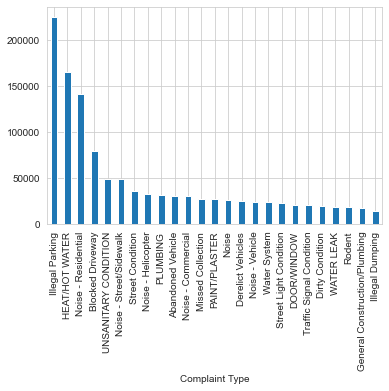

In [81]:
df['Complaint Type'].value_counts().head(25).plot(kind="bar")

Now let's see which complaints NYPD responded to.

In [68]:
df_nypd = df[df['Agency'] == 'NYPD']
df_nypd['Complaint Type'].value_counts()

Complaint Type
Illegal Parking                224726
Noise - Residential            141438
Blocked Driveway                79762
Noise - Street/Sidewalk         48886
Abandoned Vehicle               30455
Noise - Commercial              29975
Noise - Vehicle                 24283
Encampment                       9074
Non-Emergency Police Matter      8836
Drug Activity                    7082
Animal-Abuse                     3806
Panhandling                      2940
Noise - Park                     2416
Traffic                          2205
Illegal Fireworks                1053
Drinking                         1050
Graffiti                         1049
Noise - House of Worship          902
Bike/Roller/Skate Chronic         676
Urinating in Public               297
Disorderly Youth                   60
Posting Advertisement              47
Squeegee                           21
Name: count, dtype: int64

In [58]:
df_complaint = df.groupby(["Agency","Complaint Type"])["Complaint Type"].count()
df_complaint.head(50)

Agency                                        Complaint Type                         
DCA                                           Consumer Complaint                          9392
DCWP                                          Consumer Complaint                           982
DEP                                           Air Quality                                 6165
                                              Asbestos                                     392
                                              Hazardous Materials                          887
                                              Industrial Waste                             350
                                              Internal Code                                  2
                                              Lead                                        4004
                                              Noise                                      25672
                                              Plant        

In [66]:
df_nypd_complaint = df_nypd.groupby("Complaint Type")["Complaint Type"].count()

df_nypd_complaint

Complaint Type
Abandoned Vehicle               30455
Animal-Abuse                     3806
Bike/Roller/Skate Chronic         676
Blocked Driveway                79762
Disorderly Youth                   60
Drinking                         1050
Drug Activity                    7082
Encampment                       9074
Graffiti                         1049
Illegal Fireworks                1053
Illegal Parking                224726
Noise - Commercial              29975
Noise - House of Worship          902
Noise - Park                     2416
Noise - Residential            141438
Noise - Street/Sidewalk         48886
Noise - Vehicle                 24283
Non-Emergency Police Matter      8836
Panhandling                      2940
Posting Advertisement              47
Squeegee                           21
Traffic                          2205
Urinating in Public               297
Name: Complaint Type, dtype: int64

Now visualize the agencies responding to complaints to see get a sense of the general distribution of calls and responses.

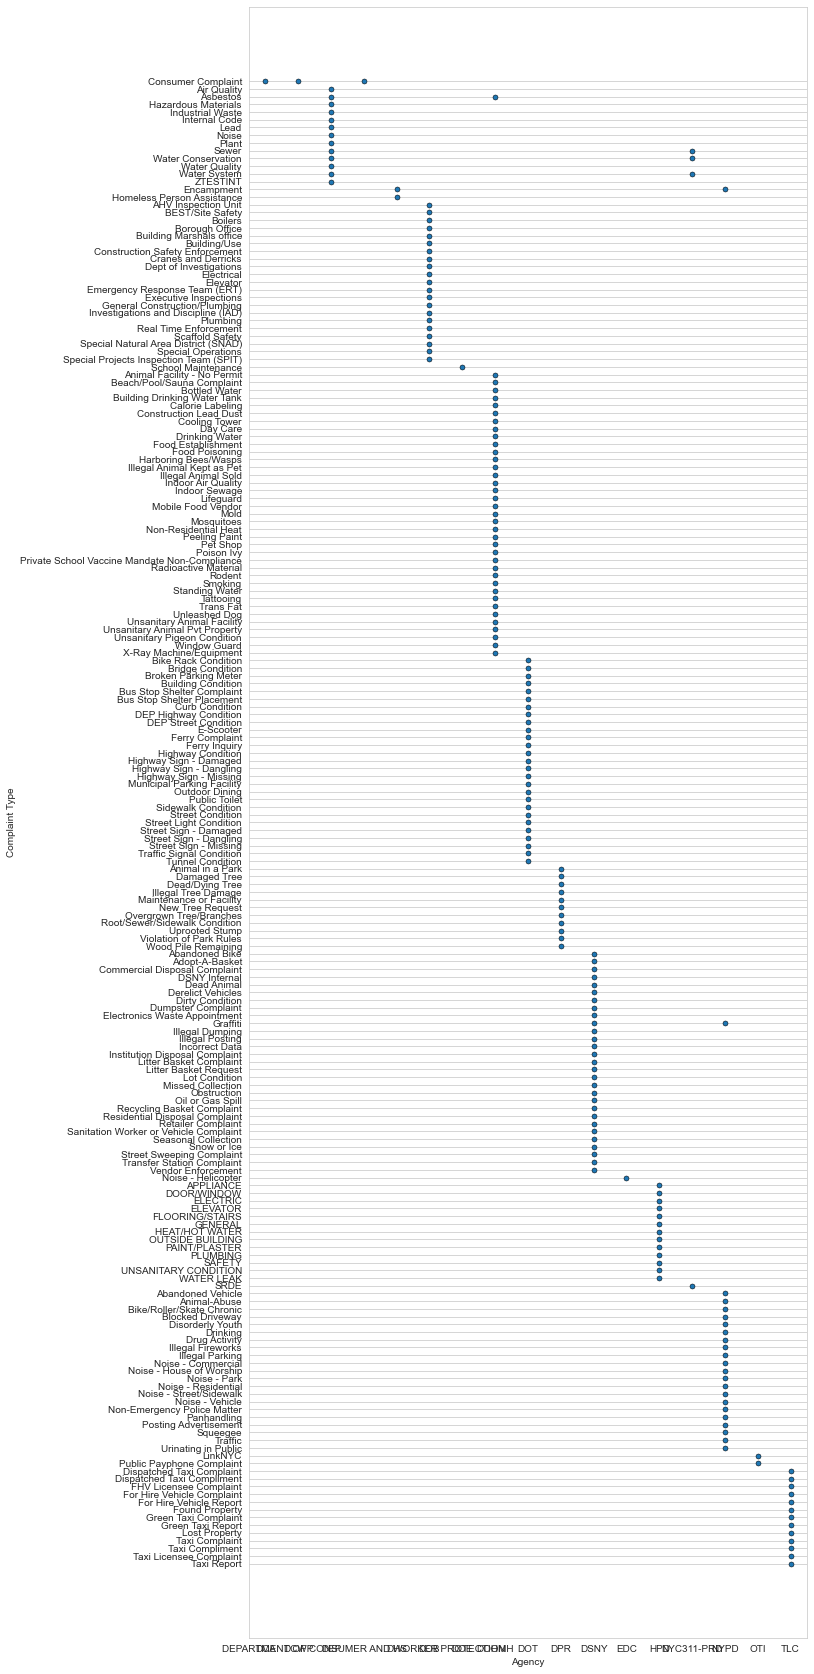

In [76]:
from seaborn import swarmplot

plt.figure(figsize=(10,30))

swarmplot(data = df_complaint,
             x='Agency',
             y='Complaint Type',
             edgecolor='black',
             linewidth=.5)


plt.show()

In [85]:
df_nypd['Descriptor'].value_counts()

Descriptor
Loud Music/Party                  142063
Blocked Hydrant                    65234
No Access                          58834
Banging/Pounding                   52474
Posted Parking Sign Violation      51157
With License Plate                 30455
Blocked Sidewalk                   25803
Loud Talking                       25037
Partial Access                     20928
Commercial Overnight Parking       20083
Car/Truck Music                    15136
Blocked Bike Lane                  14709
Blocked Crosswalk                  12194
Double Parked Blocking Traffic     11716
Paper License Plates                7303
Double Parked Blocking Vehicle      7015
Other (complaint details)           6832
Use Outside                         6366
Engine Idling                       5229
Car/Truck Horn                      5130
Parking Permit Improper Use         5096
Trespassing                         2881
Loud Television                     2831
Unauthorized Bus Layover            2384
Negle

In [92]:
df_nypd.groupby(["Complaint Type","Descriptor"])["Descriptor"].count().head(60)

Complaint Type               Descriptor                    
Abandoned Vehicle            With License Plate                30455
Animal-Abuse                 Chained                             172
                             In Car                               45
                             Neglected                          1806
                             No Shelter                          385
                             Other (complaint details)           886
                             Tortured                            512
Blocked Driveway             No Access                         58834
                             Partial Access                    20928
Disorderly Youth             Nuisance/Truant                      38
                             Playing in Unsuitable Place          22
Drinking                     After Hours - Licensed Est           90
                             In Public                           661
                             Underage - Lic

## Calls by date

In [6]:
df['Created Date'] = pd.to_datetime(df['Created Date'], yearfirst= True)

/var/folders/0q/9_wg6gm13fj5hcw6gk23gxw80000gq/T/ipykernel_67505/1671031002.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], yearfirst= True)


In [7]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'], yearfirst= True)

/var/folders/0q/9_wg6gm13fj5hcw6gk23gxw80000gq/T/ipykernel_67505/3825614721.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'], yearfirst= True)


In [23]:
df['Created Date only'] = pd.to_datetime(df['Created Date']).dt.normalize()
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Created Date only
0,56134647,2022-12-01 00:00:11,2022-12-09 16:38:58,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10301,200 VICTORY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.636293,-74.082440,"(40.636293474974806, -74.08244046227374)",2022-12-01
1,56131589,2022-12-01 00:00:17,2022-12-01 01:52:43,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10030,2427 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.819537,-73.940600,"(40.819536592759505, -73.94059981128)",2022-12-01
2,56126881,2022-12-01 00:00:46,2022-12-01 00:45:26,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11691,20-21 SEAGIRT BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.595156,-73.754689,"(40.595155544134954, -73.75468870713773)",2022-12-01
3,56129263,2022-12-01 00:00:54,2022-12-01 02:16:33,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233,1647 STERLING PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.671113,-73.924160,"(40.67111284206312, -73.92416031442114)",2022-12-01
4,56125629,2022-12-01 00:01:00,2022-12-01 01:17:24,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11221,150 MALCOLM X BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.688335,-73.930144,"(40.688334599490894, -73.93014442097454)",2022-12-01


In [30]:
df_count = df.groupby(df['Created Date only'],as_index=False).count()
df_count.head()

,Created Date only,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,2022-12-01,9002,9002,8669,9002,9002,9002,8774,7882,8898,...,3,3,92,76,35,10,76,8884,8884,8884
1,2022-12-02,8771,8771,8525,8771,8771,8771,8568,7634,8692,...,3,5,78,53,23,10,53,8667,8667,8667
2,2022-12-03,7013,7013,6825,7013,7013,7013,6811,6413,6938,...,0,2,116,55,23,14,55,6938,6938,6938
3,2022-12-04,7155,7155,7028,7155,7155,7155,7002,6571,7081,...,0,4,64,60,20,16,60,7073,7073,7073
4,2022-12-05,9008,9008,8755,9008,9008,9008,8779,7762,8913,...,3,12,154,64,28,20,64,8880,8880,8880


We can now plot this as a time series

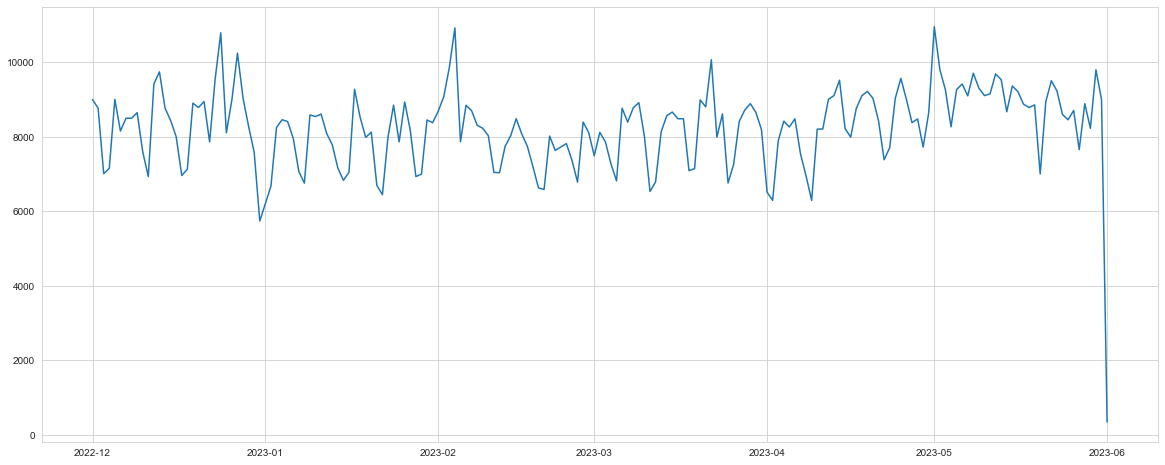

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.plot(df_count['Created Date only'], df_count['Unique Key'])

plt.show()

## Visulazing points

In [5]:
import geopandas #pip install geopandas
import geoplot#pip install geoplot
from geodatasets import get_path #pip install geodatasets

In [4]:
pip install geoplot

  Using cached geoplot-0.5.1-py3-none-any.whl (28 kB)
  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mapclassify-2.5.0-py3-none-any.whl (39 kB)
  Using cached contextily-1.3.0-py3-none-any.whl (16 kB)
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached rasterio-1.3.7-cp39-cp39-macosx_10_15_x86_64.whl (22.9 MB)
  Using cached xyzservices-2023.5.0-py3-none-any.whl (56 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-macosx_12_0_x86_64.whl size=10796929 sha256=b94facd78350ba2a2f968dffb2e8b4fdeee1840eaf7b855b2d53c5d8faab8c53
  Stored in d

Note: you may need to restart the kernel to use updated packages.


In [6]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)
gdf.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,56134647,12/01/2022 12:00:11 AM,12/09/2022 04:38:58 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10301,200 VICTORY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.636293,-74.082440,"(40.636293474974806, -74.08244046227374)",POINT (-74.08244 40.63629)
1,56131589,12/01/2022 12:00:17 AM,12/01/2022 01:52:43 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10030,2427 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.819537,-73.940600,"(40.819536592759505, -73.94059981128)",POINT (-73.94060 40.81954)
2,56126881,12/01/2022 12:00:46 AM,12/01/2022 12:45:26 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11691,20-21 SEAGIRT BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.595156,-73.754689,"(40.595155544134954, -73.75468870713773)",POINT (-73.75469 40.59516)
3,56129263,12/01/2022 12:00:54 AM,12/01/2022 02:16:33 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233,1647 STERLING PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.671113,-73.924160,"(40.67111284206312, -73.92416031442114)",POINT (-73.92416 40.67111)
4,56125629,12/01/2022 12:01:00 AM,12/01/2022 01:17:24 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11221,150 MALCOLM X BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.688335,-73.930144,"(40.688334599490894, -73.93014442097454)",POINT (-73.93014 40.68833)


In [19]:
from shapely.geometry import Point, Polygon
import geodatasets
import contextily as cx

/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


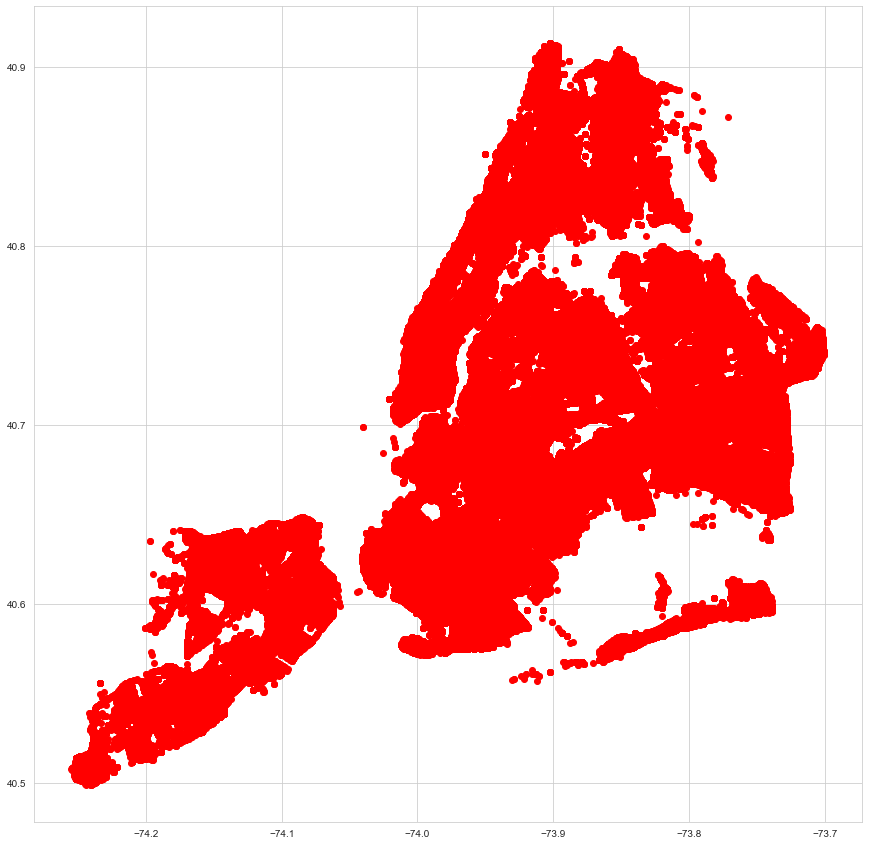

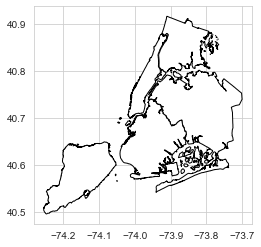

In [23]:
fig,ax=plt.subplots(figsize=(15,15))

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))

# We restrict to NYC.
boroughs.plot(color="white", edgecolor="black")

crs={'init':'epsg:4326'}
geo_df=geopandas.GeoDataFrame(gdf,crs=crs,geometry=geopandas.points_from_xy(gdf["Longitude"], gdf["Latitude"]))
# We can now plot our ``GeoDataFrame``.
geo_df.plot(ax=ax, color="red")

plt.show()





In [8]:
plt.figure(figsize=(15,15))

gdf.plot(ax=ax, color="red")

plt.show()

<Figure size 1080x1080 with 0 Axes>